# Приоритизация гипотез,  A/B-тест и анализ результатов

**Суть проекта:**
Интернет-магазину необходимо проанализировать гипотизы для увеличения выручки, провести их приоритизацию, запустить А/В-тест и проанализировать результаты.

Проект состоит из двух частей:

1) Приоритизация гипотез. 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

2) Анализ А/В-теста. Мы провели А/В-тест и получили результаты. Необходимо:
- Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
- Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
- Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
- Построить график кумулятивной конверсии по группам. Сделать выводы и предположения.
- Построить график относительного изменения кумулятивной конверсии группы B к группе A. Сделать выводы и предположения.
- Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
- Построить 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
- Построить точечный график стоимостей заказов. Сделать выводы и предположения.
- Посчитать 95-й и 99-й перцентили стоимости заказов. Выберать границу для определения аномальных заказов.
- Посчитать статистическую значимость различий в конверсии между группами по «сырым» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
- Принять решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

Короче работы немерено =) поехали!

## Приоритизация гипотез

### Загрузка данных

In [1]:
import pandas as pd
from scipy import stats as st
import numpy as np
import math as mth
import datetime as dt
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
register_matplotlib_converters()

In [2]:
# Сброс ограничений на количество выводимых рядов
pd.set_option('display.max_rows', None)
 
# Сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)
 
# Сброс ограничений на количество символов в записи
pd.set_option('display.max_colwidth', None)

In [3]:
hypotheses = pd.read_csv('/datasets/hypothesis.csv', sep=',')

hypotheses.columns = hypotheses.columns.str.lower() #наведем порядок в названиях колонок

hypotheses

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Данные загружены и подготовлены, можно приступать к приоритизации гипотиз и проведению анализа. 

Судя по всему, в компании принято выставлять оценки параметров reach, impact, confidence, efforts по десятибальной шкале.

### Фреймворк ICE

Фреймворк ICE основан на параметрах влияние, уверенность, усилия.

In [4]:
hypotheses['ICE'] = round(hypotheses['impact'] * hypotheses['confidence'] / hypotheses['efforts'],2) #Расчет ICE

display(hypotheses[['hypothesis','ICE']].sort_values(by='ICE', ascending=False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Согласно расчетов ICE, приоритетными являются гипотезы:
 1) Запустить акцию, дающую скидку на товар в день рождения
 
 2) Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
 
 3) Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
    
У данных гипотез высокие значения параметров влияния и уверенности, относительно не высокая сложность внедрения.
    
Такие сложные задачи как изменение структуры категорий для увеличения конверсии или запуск собственной службы доставки упали в середину и конец списка по причине высокой сложности реализации (параметр `efforts`). 

Ну а менеджеры, отвечающие за формирование списка гипотез и их оценивание, не верят в необходимость и значимость изменений фона главной страницы или добавление отзывов о магазине. Параметры `impact` и `confidence` данных гипотез находятся на низком уровне, что не позволяет им подняться в списке фреймворка ICE выше.

### Фреймворк RICE

In [5]:
# Расчет RICE
hypotheses['RICE'] = hypotheses['reach'] * hypotheses['impact'] * hypotheses['confidence'] / hypotheses['efforts']

display(hypotheses[['hypothesis', 'RICE']].sort_values(by = 'RICE', ascending =False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


В формировании фреймворка RICE добавляется параметр охвата (`reach`).

Согласно расчётам по RICE, приоритетными являются гипотезы:

1) Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

2) Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа

3) Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

3) Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

Гипотеза о запуске акции, дающей скидку на день рождения выбыла из топ-3 по сравнению с ICE по причине маленького значения `reach`, всего 1 балл.

Что тут скажешь, все так. Ведь как пел Крокодил Гена: "К сожаленью, день рожденья только раз в году!" 

### Вывод

Проведенный анализ гипотез по фреймворкам ICE и RICE показал, что приоритетными для реализации являются следующие гипотезы:
    
**По ICE:** 
1) Запустить акцию, дающую скидку на товар в день рождения

2) Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

3) Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

**По RICE:**
1) Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

2) Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа

3) Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

3) Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

**На мой взгляд компании необходимо обратить внимание на приоритизацию по RICE, так как в данном расчете фреймворка участвует большее число параметров, а значит и он является более объективным.**


## A/B-тест

### Загрузка данных

In [6]:
orders = pd.read_csv('/datasets/orders.csv', sep=',')

orders.info()

orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

orders.rename(columns={'transactionId': 'orderId', 'visitorId': 'userId'}, inplace=True)

orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,orderId,userId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [7]:
visitors = pd.read_csv('/datasets/visitors.csv', sep=',')

#visitors.info()

visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

display(visitors.head(5))
display(visitors['visitors'].sum())

display(visitors.groupby('group')['visitors'].sum())


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


37652

group
A    18736
B    18916
Name: visitors, dtype: int64

Датасеты с результатами А/В-теста загружены, типы данных и наименование колонок приведены в соответствие, можно начинать наш анализ. 

Всего в выборку попали 37652 посещения нашего сайта в период с 01.08.2019 г. по 31.08.2019 г.  Пользователи практически поровну разделены между группами А и В: 50,2% и 49,8% соответственно. Не думаю, что это критическое отклонение.

Достаточная ли такого в целом количества наблюдений для проведения А/В теста увы не понятно, так как у нас нет данных на входе сути самого исследования, и его заданных параметров (время, что исследуем, какими инструментами и т.д.), уровня статистической значимости, мощности. По-умолчанию примем вариант, что количество наблюдений у нас является исчерпывающим, наш эксперимент направлен на улучшении конверсии на 10% по сравнению с контрольной группой. 

Калькуляторы размеров выборок выдают более или менее похожие цифры по продолжительности и размерам выборки в этом случае хD

In [8]:
print ('Количество явных дубликатов в датасете с заказами равно', orders.duplicated().sum())
print ('Количество явных дубликатов в датасете со статистикой посещений сайта равно', visitors.duplicated().sum())

Количество явных дубликатов в датасете с заказами равно 0
Количество явных дубликатов в датасете со статистикой посещений сайта равно 0


In [9]:
group_test = orders.query('group == "A"')['userId'].unique() is not  orders.query('group == "B"')['userId'].unique()
print('Отсутсвуют пересечение пользователей между группами А и В - ', group_test)

Отсутсвуют пересечение пользователей между группами А и В -  True


### Построение графика кумулятивной выручки по группам

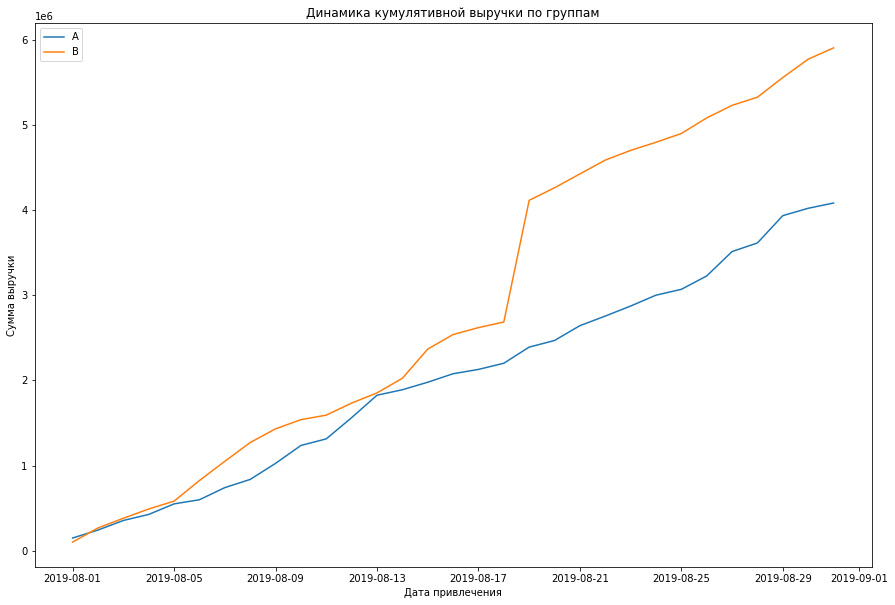

In [10]:
# формируем список дат и групп нашего А/В-теста
datesGroups = orders[['date', 'group']].drop_duplicates()

# формируем кумулятивные данные о покупках и количестве визитов на сайт за период А/В-теста
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'orderId': 'nunique',
            'userId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

# Объединяем кумулятивные датасеты
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
] 

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Параметры графика
plt.figure(figsize=(15, 10))

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.xlabel('Дата привлечения')
plt.ylabel('Сумма выручки')
plt.title('Динамика кумулятивной выручки по группам')
plt.legend() 
plt.show()


График кумулятивной выручки по группам показывает рост выручки в течении всего теста. Выручка группы В выше группы А, причем в группе В имеется точка резкого роста, что сигнализирует нам о  всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. Такие выбросы необходимо будет учесть при анализе.

### Построение графика кумулятивного среднего чека по группам

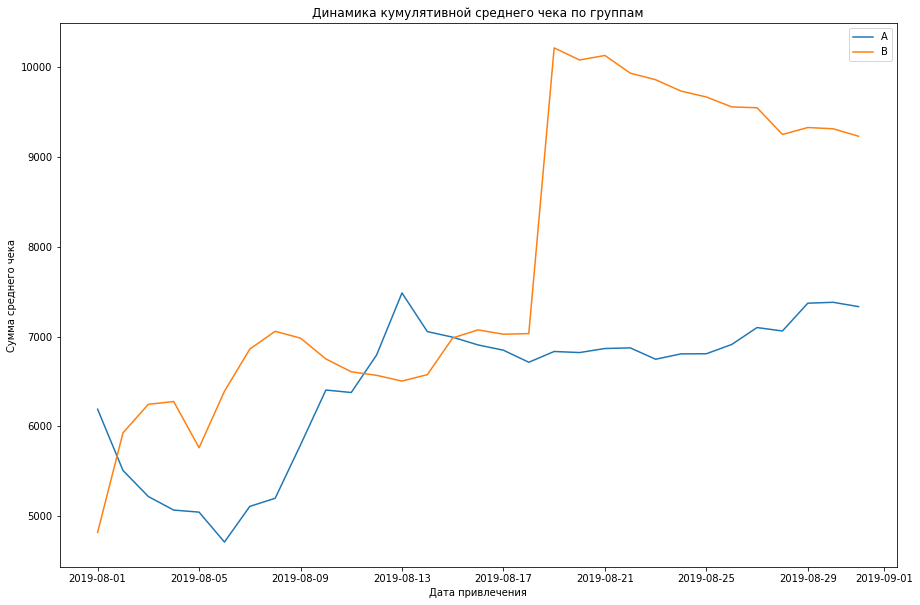

In [11]:
plt.figure(figsize=(15, 10))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.xlabel('Дата привлечения')
plt.ylabel('Сумма среднего чека')
plt.title('Динамика кумулятивной среднего чека по группам')
plt.legend() 
plt.show()

Построим графики среднего чека по группам путем деления кумулятивной выручки на кумулятивное число заказов.

На графике видно, что в группе А за период теста средний чек имел несколько трендов: нисходящий с 6000 рублей до 4500 рублей в период с 1 августа по 6 августа, далее рост с 7 по 13 августа до уровня 7500 рублей, после чего произошла незначительная коррекция до уровня 7000 рублей и на графике видно горизонтальный тренд. В период с 11 по 14 августа средний чек группы А был выше, чем в группе В. Скачки графика в первой половине теста группы А так же говорят нам, что в период с 7 по 13 число в группе было совершено несколько крупных покупок.

В группе В о среднем чеке за период эксперимента можно сказать, что он имел устойчивый рост на протяжении всего эксперимента, незначительные просадки по графикам связаны с коррекциями после крупных покупок. Стоит отметить, что таких пар "рост-снижение" у нас насчиталось три. Таким образом, в группу В в рассматриваемый период так же попали заказы с крупными средними чеками. Так же можно отметить, что первоначальный средний чек в группе В был ниже, чем в группе А.

### Построение графика относительного изменения кумулятивного среднего чека группы B к группе A

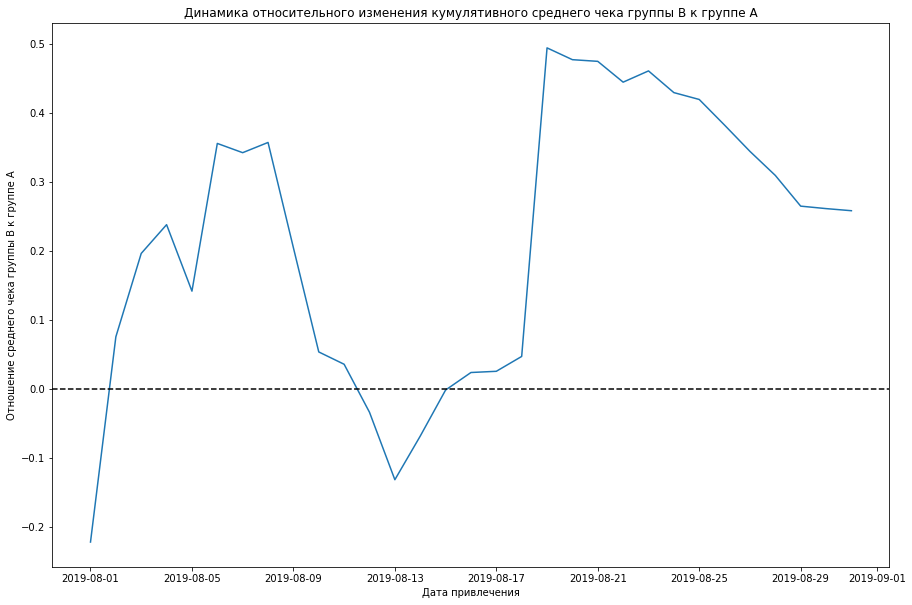

In [12]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15, 10))

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

plt.xlabel('Дата привлечения')
plt.ylabel('Отношение среднего чека группы В к группе А')
plt.title('Динамика относительного изменения кумулятивного среднего чека группы В к группе А')
plt.show()

В течении эксперимента, выручка группы В в целом была больше, чем в группе А, причем разрыв доходил до 50%. В нескольких точках график различия между сегментами резко меняет направление. Точно в группе В имеются крупные заказы и выбросы!

### Построение графика кумулятивной конверсии по группам

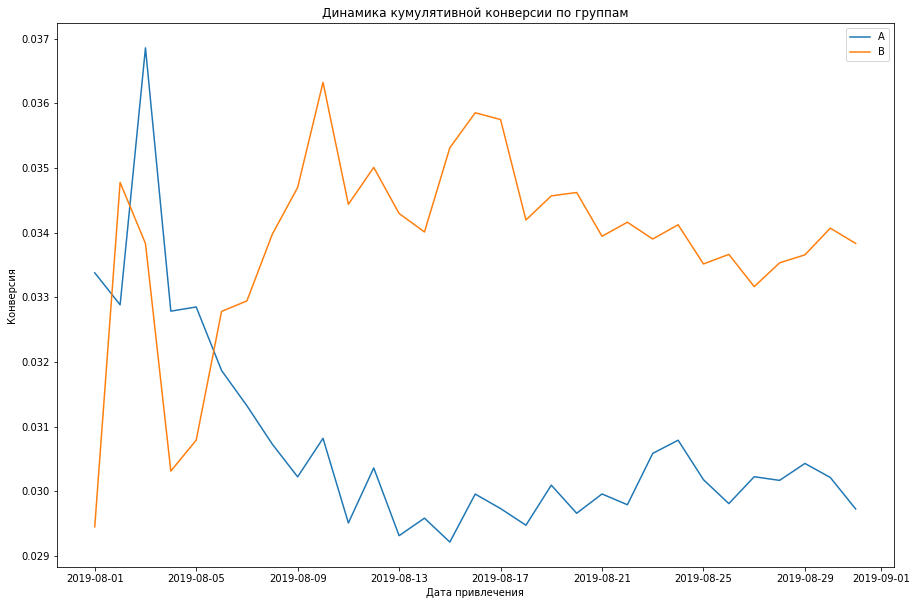

In [13]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(15, 10))

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.xlabel('Дата привлечения')
plt.ylabel('Конверсия')
plt.title('Динамика кумулятивной конверсии по группам')
plt.legend()
plt.show()

Не считая начала теста, когда конверсия в обеих группах росла, можно сказать что на графике присутствует некая симметрия. Конверсии групп В и А симметрично колеблются в районе 3 - 3,5% для каждой группы. В целом конверсия группы В в течении эксперимента была выше в среднем ориентировочно на 0,5 процентных пункт.

### Построение графика относительного изменения кумулятивной конверсии группы B к группе A

(18109.0, 18139.0, -0.15, 0.25)

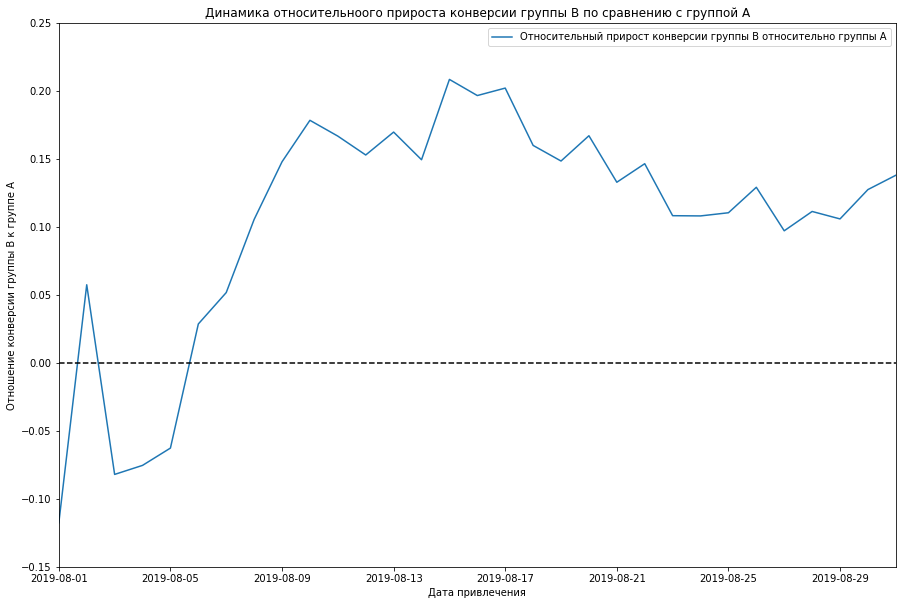

In [14]:
mergedCumulativeConversions = cumulativeDataA[
    ['date','conversion']
].merge(
    cumulativeDataB[['date','conversion']],
    left_on='date',
    right_on='date',
    how='left',
    suffixes=['A', 'B']
)


plt.figure(figsize=(15, 10))

plt.plot(mergedCumulativeConversions['date'],
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1,
         label="Относительный прирост конверсии группы B относительно группы A")

plt.xlabel('Дата привлечения')
plt.ylabel('Отношение конверсии группы В к группе А')
plt.title('Динамика относительноого прироста конверсии группы В по сравнению с группой А')
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.15, 0.25])

В начале теста группа B значительно проигрывала группе A, затем начиная с 06.08.2019 г. вырвалась вперёд. В целом можно сказать, что конверсия группы В относительно группы А была выше на 15-20% начиная с 09.08.2019 г., т.е. большую часть эксперимента. Это хороший относительный рот показателя конверсии, но пока рано говорить о каких-либо окончательных результатах, необходимо провести анализ аномальных значений числа покупок и сумм заказов по группам. Этот анализ может быстро скорректировать результаты тестирования.

### Построение точечного графика количества заказов по пользователям

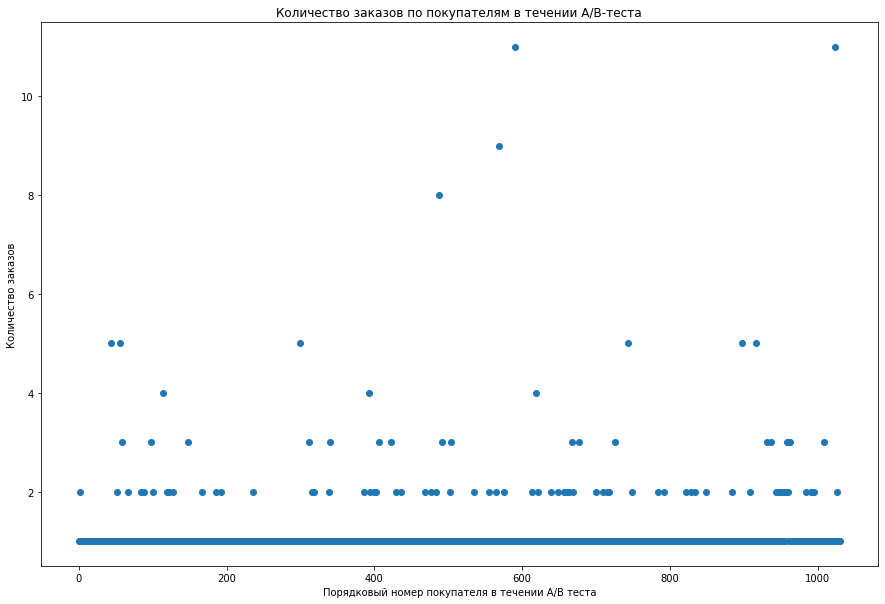

In [15]:
#сгруппириуем заказы по пользователям и посмотрим на их активность.
ordersByUsers = (
    orders.groupby('userId', as_index=False)
    .agg({'orderId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']

x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(15, 10))
plt.scatter(x_values, ordersByUsers['orders'])

plt.xlabel('Порядковый номер покупателя в течении А/В теста')
plt.ylabel('Количество заказов')
plt.title('Количество заказов по покупателям в течении А/В-теста')
plt.show()

График показывает, что большинство пользователей делают 1-2 заказа. 3 и более заказов выглядят как выбросы. В течении эксперимента, попадались несколько покупателей, сделавшие 8,9,11 заказов. Вот это я понимаю, активность :) всем бы таких покупателей и побольше :)
Убедимся в выводах, сделанным на графике, расчитав 95-й и 99-й перцентили количества заказов на пользователя.

### Расчет 95-й и 99-й перцентили количества заказов на пользователя

In [16]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


Перцентили говорят нам, что нее более 5% пользователей оформляли больше чем 2 заказов, и только 1% пользователей — больше 4 раз И 10% пользователей заказывали более трёх раз.
Разумно выбрать 2 или 3 заказов на одного пользователя за нижнюю границу числа заказов, и отсеять аномальных пользователей по ней. Таким образом, мы лишимся от 1 до 5% данных, а наш датасет - выбросов по количеству сделанных заказов пользователями внутри групп.

### Построение точечного графика стоимостей заказов

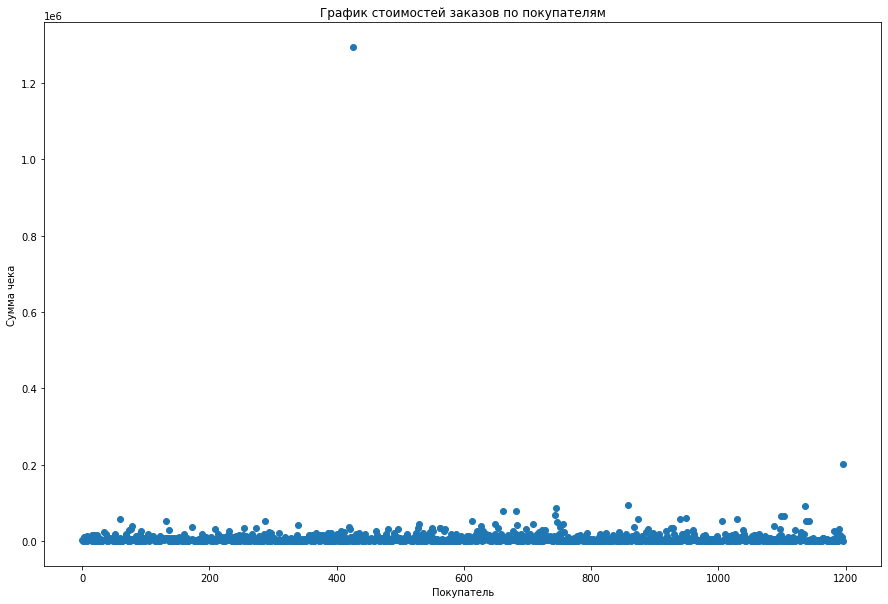

In [17]:
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.figure(figsize=(15, 10))
plt.scatter(x_values, orders['revenue'])
plt.xlabel('Покупатель')
plt.ylabel('Сумма чека')
plt.title('График стоимостей заказов по покупателям')
plt.show()

На графике стоимостей заказов видно, что практически все заказы укладываются в область до 50000 рублей, хоть и есть впечатляющие выбросы по данному параметру, вплоть до 1,2 млн рублей. Перестроим график с другим масштабом, убедимся в правильности первоначальных выводов.

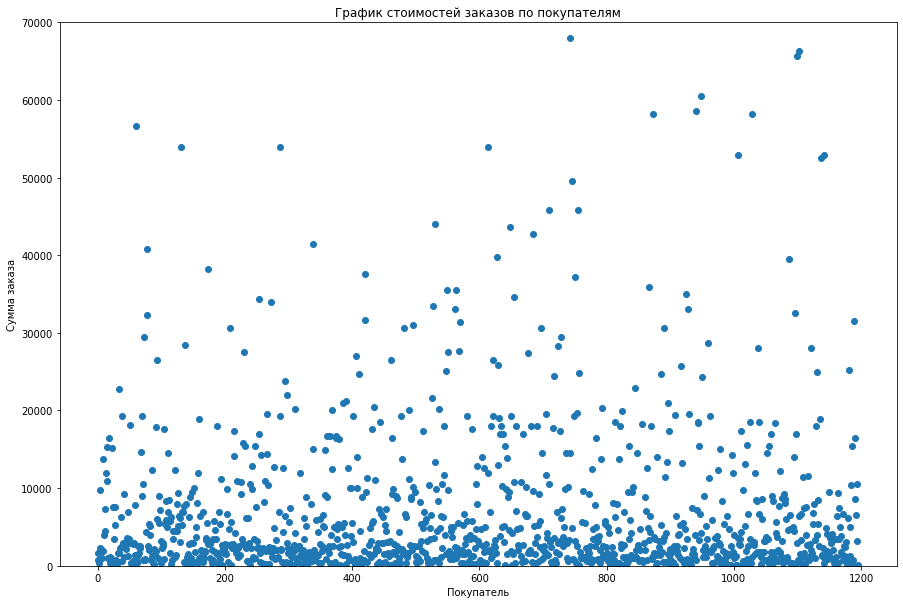

In [18]:
plt.figure(figsize=(15, 10))
plt.scatter(x_values, orders['revenue'])
plt.ylim (0, 70000)
plt.xlabel('Покупатель')
plt.ylabel('Сумма заказа')
plt.title('График стоимостей заказов по покупателям')
plt.show()

На уточненном графике видно, что наибольшая плотность у заказов стоимстью до 5 тысяч рублей, далее идут группы заказов стоимостью до 10000, 20000 тысяч. Тоже весьма плотные результаты. По графику сложно точно сказать, где у нас будет 95% перцентиль, чтобы отсеять аномалии. Расчитаем ее далее. 

### Расчет 95-й и 99-й перцентили стоимости заказов

In [19]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


Ну вот, графики говорят одно, но более точно нам все могут сказать только цифры. Имеем не более 5% заказов дороже 28000 рублей и не более 1% дороже 58000 рублей. Учтем эту информацию при отсеивании аномалий.

### Расчет статистической значимости различий в конверсии между группами по «сырым» данным 

При расчете статистической значимости различий сначала обозначим, что принимаем  пороговый уровень статистической значимости Альфа равный 5% или 0,05.

Зная, что мы имеем неоднородный массив данных о покупках внутри групп, а так же предполагая, что имеются существенные различия между группами (т.е. выбросы), применение параметрических тестов для поиска статистической значимости нашего теста будет не корректно. Для определения статистической значимости в данном примере корректнее всего применить непараметрический тест непараметрический тест Уилкоксона-Манна-Уитни, основанный на идеи проранжировать две выборки по порядку от меньшего к большему и сравнении рангов одних и тех же значений, попавших в обе выборки.

На этом этапе сформируем нулевую и альтернативную гипотезы:
- Нулевая гипотеза Н0: Конверсия внутри групп А и В одинаковы.
- Альтернативная гипотеза Н1: Конверсия внутри групп А и В не равны между собой.

In [20]:
# соберем датасет, содержаший в себе информацию о кумулятивном посещении пользователями различных групп, а так же выручке

visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head(5))

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [21]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули.

In [22]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

# Проведем проверку статистической значимости критерием Манна-Уитни.

alpha = 0.05

results = st.mannwhitneyu(sampleA, sampleB) 

print('p-значение: ', "{0:.3f}".format(results.pvalue))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя') 
print("Относительный прирост конверсии группы B:","{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-значение:  0.017
Отвергаем нулевую гипотезу: разница статистически значима
Относительный прирост конверсии группы B: 0.138


По "сырым" данным получаем p-value = 0.017, что меньше заданного уровня статистической значимости 0,05. Это говорит нам, что мы можем отвергнуть нулевую гипотезу и  утверждать, что в течении А/В-теста конверсия внутри групп была различна.
Относительный прирост конверсии внутри группы В по сравнению с группой А составил 13,8%. Это значительный прирост.

### Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным.

Теперь по "сырым" данным проверим статистическую значимость различий в среднем чеке между сегментами:

- Нулевая гипотеза: различий в среднем чеке между группами нет. 
- Альтернативная гипотеза: различия в среднем чеке между группами есть.

Так же найдём относительные различия в среднем чеке между группами.

In [23]:
results = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue']) 

print('p-значение: ', "{0:.3f}".format(results.pvalue))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')
    
print("Относительный прирост среднего чека группы B:","{0:.3f}".format(
    orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)
     )

p-значение:  0.729
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
Относительный прирост среднего чека группы B: 0.259


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. В то же время показатель относительного прироста среднего чека группы В к группе А говорит нам о значительном росте в 25,9% процента. В данный показатель наверняка вмешались аномально высокие значения чеков некоторых покупок, убедимся в этом. 

### Расчет статистической значимости различий в конверсии между группами по «очищенным» данным. 

Напомню, что найденные в прошлых уроках 95-й и 99-й перцентили средних чеков равны 28000 и 58233,2 рублям. А 95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4 заказа на пользователя.
Примем за аномальных пользователей тех, кто совершил от 2 заказов или совершил заказ дороже 40 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. 


In [24]:
#Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders 
# и пользователей, совершивших заказы дороже 4 000 — usersWithExpensiveOrders. 
# Объединим их в таблице abnormalUsers.

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 40000]['userId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

print(abnormalUsers.shape[0]) # Число аномальных пользователей

45


Всего 45 аномальных пользователей.
Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по "очищенным" данным. 

In [25]:
# Подготовим выборки количества заказов по пользователям по группам теста

sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Применим статистический критерий Манна-Уитни к полученным выборкам.

In [26]:
results = st.mannwhitneyu(sampleAFiltered, sampleBFiltered) 

print('p-значение: ', "{0:.3f}".format(results.pvalue))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')
    
print("Относительный прирост конверсии группы B:","{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-значение:  0.007
Отвергаем нулевую гипотезу: разница статистически значима
Относительный прирост конверсии группы B: 0.188


Как и при анализе "сырых" данным, получаем p-value меньше заданного уровня статистической значимости 0,05. Это говорит нам о том, что мы можем окончательно отвергнуть нулевую гипотезу и  утверждать, что в течении А/В-теста конверсия внутри групп была различна.
Относительный прирост конверсии внутри группы В по "очищенным" данным по сравнению с группой А вырос и составил 18,8% против 13,8% при "сыром" расчете. Это значительный прирост.

### Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным

In [27]:
results = st.mannwhitneyu(
    orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['userId'].isin(abnormalUsers)),)]['revenue'],
    orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['userId'].isin(abnormalUsers)),)]['revenue']
) 

print('p-значение: ', "{0:.3f}".format(results.pvalue))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')
    
print("Относительный прирост среднего чека группы B:", "{0:.3f}".format(
    orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-значение:  0.944
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
Относительный прирост среднего чека группы B: 0.058


P-value еще больше увеличился по сравнению с уровнем статистической значимости, говорить о статистической значимости различий в значениях средних чеков нельзя, оставляем нулевую гипотезу.
Разница между средними чеками сократилась с 25.9% при "сырых" данных до 5.8%.
Хотя общие выводы по результатам теста значений средних чеков не изменились, данный пример хорошо показывает, как сильно аномалии могут влиять на результаты A/B-теста.

### Принятие решения по результатам теста. Вывод

Итак, подытожим. 
1) У нас имеется факт принятия статистической значимости различия конверсии между группами как по "сырым", так и по "обработанным" данным. 

2)  Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий.

3) График различия конверсии между группами сообщает, что результаты группы B лучше группы A и нет значительной тенденции к какой-то его коррекции. Относительная конверсия группы В  по сравнению с группой А улучшилась на 18,8%.

Исходя из обнаруженных фактов, и сделав оговорку что мы верно сделали допуск о целях теста и его параметрах (ввиду их отсутствия в ТЗ), считаю что можно остановить тест, зафиксировать победу группы В. Изменения в работе сайта действительно имели положительное влияние на конверсию.

## Общий вывод

В ходе анализа проведена приоритизация имеющихся гипотез и рассмотрены результаты А/В-тестирования.

Все имеющиеся гипотезы удовлетворительно сформированы и не противоречат общим правилам формирования гипотез в бизнесе.

Проведенный анализ гипотез по фреймворкам ICE и RICE показал, что приоритетными для реализации являются следующие гипотезы:
    
**По ICE:** 
1) Запустить акцию, дающую скидку на товар в день рождения

2) Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

3) Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

**По RICE:**
1) Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

2) Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа

3) Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

3) Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

**На мой взгляд компании необходимо обратить внимание на приоритизацию по RICE, так как в данном расчете фреймворка участвует большее число параметров, а значит и он является более объективным.**




**Проведенный А/В-тест с оговоркой на нехватку первоначальных данных можно считать успешным:**

1) Имеется факт принятия статистической значимости различия конверсии между группами как по "сырым", так и по "обработанным" данным. 

2)  Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий.

3) График различия конверсии между группами сообщает, что результаты группы B лучше группы A и нет значительной тенденции к какой-то его коррекции. Относительная конверсия группы В  по сравнению с группой А улучшилась на 18,8%.

Исходя из обнаруженных фактов, и сделав оговорку что мы верно сделали допуск о целях теста и его параметрах (ввиду их отсутствия в ТЗ), **считаю, что можно остановить тест, зафиксировать победу группы В. Изменения в работе сайта действительно имели положительное влияние на конверсию.**
